# ADA - Homework 3

In [62]:
# The required libraries for this notebook
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import json
import folium

## Unemployment rate in Europe

### Data acquisation  
No visualization can be done without data! We collected the data of unemployment rate in Europe from the official website of the statistical office of the European Union [eurostat](http://ec.europa.eu/eurostat/data/database). In fact, we used the following dataset [Unemployment rate - quarterly data, seasonally adjusted](http://ec.europa.eu/eurostat/web/products-datasets/-/tipsun30) and considered particularly the most actual satistics from the second quarter of 2017 to build our analysis. We finally extracted the data in a XLS-file, which contains the unemployment rate of 28 European states that constitute the European Union.

### Data cleaning

In [76]:
# Read the unemployment rate data from the XLS-file
eur_data = pd.read_excel('unemployment.xls', skiprows=[0])

In [77]:
eur_data.head()

,geo\time,1995Q1,Unnamed: 2,1995Q2,Unnamed: 4,1995Q3,Unnamed: 6,1995Q4,Unnamed: 8,1996Q1,...,2016Q3,Unnamed: 174,2016Q4,Unnamed: 176,2017Q1,Unnamed: 178,2017Q2,Unnamed: 180,2017Q3,Unnamed: 182
0,BE:Belgium,9.7,NaN,9.6,NaN,9.7,NaN,9.8,NaN,9.9,...,7.7,NaN,7.2,NaN,7.6,(b),7.3,NaN,7.2,NaN
1,BG:Bulgaria,:,NaN,:,NaN,:,NaN,:,NaN,:,...,7.4,NaN,6.8,NaN,6.5,NaN,6.2,NaN,6.1,NaN
2,CZ:Czech Republic,4.1,NaN,4.2,NaN,4,NaN,3.8,NaN,3.6,...,4.0,NaN,3.6,NaN,3.3,NaN,3.0,NaN,2.8,NaN
3,DK:Denmark,6.9,NaN,6.8,NaN,6.7,NaN,6.7,NaN,6.7,...,6.3,NaN,6.3,NaN,6.0,NaN,5.7,NaN,5.7,NaN
4,DE:Germany,8.1,NaN,8.1,NaN,8.3,NaN,8.4,NaN,8.6,...,4.1,NaN,4.0,NaN,3.9,NaN,3.8,NaN,3.6,NaN


In [78]:
# Split the code and country from the geo\time column and make each to a new column
eur_data['code'] = eur_data['geo\\time'].apply(lambda x: x.split(':')[0])
eur_data['country'] = eur_data['geo\\time'].apply(lambda x: x.split(':')[1])

In [107]:
# Consider only the columns code, country and 2017Q2
# We chose 2017Q2 because it's the most up to date column with non missing values.

eur_data = eur_data[['code','country','2017Q2']]

In [82]:
# Show the content of eur_data
eur_data.head()

,code,country,2017Q2
0,BE,Belgium,7.3
1,BG,Bulgaria,6.2
2,CZ,Czech Republic,3.0
3,DK,Denmark,5.7
4,DE,Germany,3.8


In [86]:
eur_data.tail(9)

,code,country,2017Q2
27,UK,United Kingdom,4.4
28,,=not available b=break in time series i=see me...,NaN
29,,,NaN
30,Source of Data,,NaN
31,Last update,,NaN
32,Date of extraction,,NaN
33,Hyperlink to the table,,NaN
34,General Disclaimer of the EC website,,NaN
35,Code,,NaN


In [87]:
# Remove NaN values from the dataframe, the 8 last rows basically.
eur_data = eur_data.dropna()

In [91]:
# Read the the topojson data of europe
eur_geo_path = r'europe.topojson.json'
geo_json_data = json.load(open(eur_geo_path))

In [92]:
# Extract the codes and countries from the european statistics data
codes = [elem for elem in eur_data['code']]
countries = [elem for elem in eur_data['country']]

In [93]:
# Remove all countries from the Json data, that are not in the statistics data
length = len(geo_json_data['objects']['europe']['geometries'])

num_deleted = 0 #this variable is used to correct the indexing while deleting from the Json data

# We deleted using country names and ids because some ids are not the same (We coud have used only names but maybe some countries are not written the same)
for i in range(length):
    if(not ((geo_json_data['objects']['europe']['geometries'][i-num_deleted]['id'] in codes) or (geo_json_data['objects']['europe']['geometries'][i-num_deleted]['properties']['NAME'] in countries))):
        del(geo_json_data['objects']['europe']['geometries'][i-num_deleted])
        num_deleted+=1
        
# Deleting variables used once        
del(codes,countries,length,num_deleted)

In [236]:
# We used choropleth method to plot the unemployment rate in the European Union
# We chose blue for low unemployment rate vs purple for high unemployment rate
# the choropleth method takes care about creating the class colors using a step of ((min-max)/6) from one color to another
# As blue is a cold colour suggesting low values values and purple is a hot color suggesting high values,
# we decided to map low values to blue and high values to purple

m = folium.Map(location=[54.3,8], tiles='cartodbpositron', zoom_start=4)

m.choropleth(
    geo_data=geo_json_data,
    name='Unemployment rate in European Union',
    data=eur_data,
    columns=['country', '2017Q2'],
    topojson='objects.europe',
    key_on='feature.properties.NAME',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
)

# Saving the map in and html file in the current directory
m.save('Unemployment rate in European Union')

m

In [242]:
eur_data[['2017Q2','country']].sort_values(by='2017Q2').head(5)

,2017Q2,country
2,3.0,Czech Republic
4,3.8,Germany
17,4.1,Malta
16,4.3,Hungary
27,4.4,United Kingdom


## Observation:
The unemployment rate of Switzerland is about 3.3 %, so it belongs to the lowest category in the map.
Compared to European Union, Switzerland has one of the lowest unemployment rate (The second compared to the European Union just after Czech Republic).

In [124]:
# Load the data for swiss unemployment by canton

ch_data = pd.read_csv('arbeitslosen.csv',encoding='utf-8')

In [125]:
ch_data.head()

,Kanton,Monat,September 2017,Gesamt
0,Zürich,NaN,3.3,3.3
1,Bern,NaN,2.4,2.4
2,Luzern,NaN,1.7,1.7
3,Uri,NaN,0.6,0.6
4,Schwyz,NaN,1.7,1.7


In [126]:
# Selecting the columns we are going to work with, the cantons and their unemployment rate in September 2017

ch_data = ch_data[['Kanton','September 2017']]

In [130]:
ch_data.head()

,Kanton,September 2017
0,Zürich,3.3
1,Bern,2.4
2,Luzern,1.7
3,Uri,0.6
4,Schwyz,1.7


In [137]:
# We downloaded the topojson file for swiss states.

ch_geo_path = r'ch-cantons.topojson.json'
ch_json_data = json.load(open(ch_geo_path, encoding="utf-8"))

In [138]:
# We printed the states' names to compare them with the names we have in ch_data

for prop in ch_json_data['objects']['cantons']['geometries']:
    print(prop['properties']['name'])

Zürich
Bern/Berne
Luzern
Uri
Schwyz
Obwalden
Nidwalden
Glarus
Zug
Fribourg
Solothurn
Basel-Stadt
Basel-Landschaft
Schaffhausen
Appenzell Ausserrhoden
Appenzell Innerrhoden
St. Gallen
Graubünden/Grigioni
Aargau
Thurgau
Ticino
Vaud
Valais/Wallis
Neuchâtel
Genève
Jura


In [139]:
# Printing the names that differs
for prop in ch_json_data['objects']['cantons']['geometries']:
    if(prop['properties']['name'] not in list(ch_data['Kanton'])):
        print(prop['properties']['name'])

Bern/Berne
Fribourg
Graubünden/Grigioni
Ticino
Vaud
Valais/Wallis
Neuchâtel
Genève


In [24]:
# Printing the names of our data. 
ch_data['Kanton']

0                     Zürich
1                       Bern
2                     Luzern
3                        Uri
4                     Schwyz
5                   Obwalden
6                  Nidwalden
7                     Glarus
8                        Zug
9                   Freiburg
10                 Solothurn
11               Basel-Stadt
12          Basel-Landschaft
13              Schaffhausen
14    Appenzell Ausserrhoden
15     Appenzell Innerrhoden
16                St. Gallen
17                Graubünden
18                    Aargau
19                   Thurgau
20                    Tessin
21                     Waadt
22                    Wallis
23                 Neuenburg
24                      Genf
25                      Jura
Name: Kanton, dtype: object

In [140]:
#We replace the names that differ from our data and in the topojson.
for prop in ch_json_data['objects']['cantons']['geometries']:
    if(prop['properties']['name'] == 'Bern/Berne'):
        prop['properties']['name']='Bern'
    elif(prop['properties']['name'] == 'Fribourg'):
        prop['properties']['name']='Freiburg'
    elif(prop['properties']['name'] == 'Graubünden/Grigioni'):
        prop['properties']['name']='Graubünden'
    elif(prop['properties']['name'] == 'Ticino'):
        prop['properties']['name']='Tessin'
    elif(prop['properties']['name'] == 'Vaud'):
        prop['properties']['name']='Waadt'
    elif(prop['properties']['name'] == 'Valais/Wallis'):
        prop['properties']['name']='Wallis'
    elif(prop['properties']['name'] == 'Neuchâtel'):
        prop['properties']['name']='Neuenburg'
    elif(prop['properties']['name'] == 'Genève'):
        prop['properties']['name']='Genf'

In [143]:
#Here we check if all the names are the same.
for prop in ch_json_data['objects']['cantons']['geometries']:
    if(prop['properties']['name'] not in list(ch_data['Kanton'])):
        print(prop['properties']['name'])

In [144]:
# We also used choropleth method to plot the unemployment rate in Switzerland states. 
# We chose blue for low unemployment rate vs purple for high unemployment rate
ch = folium.Map([46.8,8.4], tiles='cartodbpositron', zoom_start=8)

ch.choropleth(
    geo_data=ch_json_data,
    name='choropleth',
    data=ch_data,
    columns=['Kanton', 'September 2017'],
    topojson='objects.cantons',
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
)


# Saving the map in and html file in the current directory
m.save('Unemployment rate in Switzerland')


ch

In [147]:
#Loading the data using a new configuration that shows the number of unemployed persons that do work (Nicht arbeitslose Stellensuchende)
#and the number of unemployed that does not (Registrierte Arbeitslose) and their total number (Registrierte Stellensuchende)

ch_data2 = pd.read_csv('arbeitslosen2.csv',encoding='utf-8')

In [148]:
ch_data2.head()

,Kanton,Metriken,Arbeitslosenquote,Registrierte Arbeitslose,Registrierte Stellensuchende,Nicht arbeitslose Stellensuchende,Arbeitslosenquote.1,Registrierte Arbeitslose.1,Registrierte Stellensuchende.1,Nicht arbeitslose Stellensuchende.1
0,Zürich,NaN,3.3,27225.0,34156.0,6931.0,3.3,27225.0,34156.0,6931.0
1,Bern,NaN,2.4,13658.0,18385.0,4727.0,2.4,13658.0,18385.0,4727.0
2,Luzern,NaN,1.7,3885.0,6756.0,2871.0,1.7,3885.0,6756.0,2871.0
3,Uri,NaN,0.6,112.0,257.0,145.0,0.6,112.0,257.0,145.0
4,Schwyz,NaN,1.7,1455.0,2229.0,774.0,1.7,1455.0,2229.0,774.0


In [30]:
# Selecting the needed columns
ch_data2 = ch_data2[['Kanton','Arbeitslosenquote','Registrierte Arbeitslose','Registrierte Stellensuchende','Nicht arbeitslose Stellensuchende']]

In [153]:
ch_data2.head()

,Kanton,Metriken,Arbeitslosenquote,Registrierte Arbeitslose,Registrierte Stellensuchende,Nicht arbeitslose Stellensuchende,Arbeitslosenquote.1,Registrierte Arbeitslose.1,Registrierte Stellensuchende.1,Nicht arbeitslose Stellensuchende.1
0,Zürich,NaN,3.3,27225.0,34156.0,6931.0,3.3,27225.0,34156.0,6931.0
1,Bern,NaN,2.4,13658.0,18385.0,4727.0,2.4,13658.0,18385.0,4727.0
2,Luzern,NaN,1.7,3885.0,6756.0,2871.0,1.7,3885.0,6756.0,2871.0
3,Uri,NaN,0.6,112.0,257.0,145.0,0.6,112.0,257.0,145.0
4,Schwyz,NaN,1.7,1455.0,2229.0,774.0,1.7,1455.0,2229.0,774.0


In [157]:
# We created a new column in which there is the rate of unemployed that are not currently working
# To do so, we divided number of unemployed with no job (Registrierte Arbeitslose)
# by the total number of persons persons searching for a job (Registrierte Stellensuchende)
# which we finally multiplied by the initial rate
ch_data2['pure_unemployed']=(ch_data2['Registrierte Arbeitslose']/ch_data2['Registrierte Stellensuchende'])*ch_data2['Arbeitslosenquote']

In [167]:
ch_data2.head()

,Kanton,Metriken,Arbeitslosenquote,Registrierte Arbeitslose,Registrierte Stellensuchende,Nicht arbeitslose Stellensuchende,Arbeitslosenquote.1,Registrierte Arbeitslose.1,Registrierte Stellensuchende.1,Nicht arbeitslose Stellensuchende.1,pure_unemployed
0,Zürich,NaN,3.3,27225.0,34156.0,6931.0,3.3,27225.0,34156.0,6931.0,2.630358
1,Bern,NaN,2.4,13658.0,18385.0,4727.0,2.4,13658.0,18385.0,4727.0,1.782932
2,Luzern,NaN,1.7,3885.0,6756.0,2871.0,1.7,3885.0,6756.0,2871.0,0.977575
3,Uri,NaN,0.6,112.0,257.0,145.0,0.6,112.0,257.0,145.0,0.261479
4,Schwyz,NaN,1.7,1455.0,2229.0,774.0,1.7,1455.0,2229.0,774.0,1.109690


In [244]:
# We put the 2 choropleths together and added a control layer to compare the 2 rates within the same map.

ch2 = folium.Map([46.8,8.4], tiles='cartodbpositron', zoom_start=8)

folium.Map.choropleth(ch2,geo_data=ch_json_data,
    name='Unemployed searching for job',
    data=ch_data2,
    columns=['Kanton', 'pure_unemployed'],
    topojson='objects.cantons',
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)- Unemployed only'
)

folium.Map.choropleth(ch2,geo_data=ch_json_data,
    name='Total rate',
    data=ch_data,
    columns=['Kanton', 'September 2017'],
    topojson='objects.cantons',
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)-Total rate'
)

folium.LayerControl(autoZIndex=False).add_to(ch2)

# Saving the map in and html file in the current directory
m.save('Unemployment rate in Switzerland: Swiss vs. Foreigners')

ch2

## observations :
We notice that some states that had an important total rate such as 'Aargau', 'Solothurn' and 'St. Gallen' does not have a high unemployment rate of persons that do not have a job. So we can say that in these states the rate of persons that have a job and are looking for a job is high. 

In [175]:
# We are downloading the dataset which contains the unemployment rate splitted by foreigners and swiss

# use_cols contains the index of columns we are going to use
use_cols = list(range(8))
use_cols.remove(2)

# Downloading the dataset
chomage_suisse = pd.read_csv('2_1 Taux de chômage.csv', encoding='utf-8', index_col=[0,1], usecols=use_cols, skiprows=[0])
chomage_suisse.index.names = ['Canton','Nationalité']

# deleting use_cols because we do not needed anymore
del(use_cols)

# The variables in the columns have this form (12'144) so we remove the '\'' and cast everything to integer
chomage_suisse['Chomeurs inscrits'] = chomage_suisse['Chomeurs inscrits'].apply(lambda x: int(str(x).replace('\'','')))
chomage_suisse['Demandeurs d\'emploi'] = chomage_suisse['Demandeurs d\'emploi'].apply(lambda x: int(str(x).replace('\'','')))
chomage_suisse['Demandeurs d\'emploi non chomeurs'] = chomage_suisse['Demandeurs d\'emploi non chomeurs'].apply(lambda x: int(str(x).replace('\'','')))

chomage_suisse.head()

Taux de chomage Coefficients de variation  \
Canton  Nationalité                                              
Zurich  Etrangers                5.3                         A   
        Suisses                  2.5                         A   
Berne   Etrangers                5.5                         A   
        Suisses                  1.8                         A   
Lucerne Etrangers                3.9                         B   

                     Chomeurs inscrits  Demandeurs d'emploi  \
Canton  Nationalité                                           
Zurich  Etrangers                12111                15384   
        Suisses                  15114                18772   
Berne   Etrangers                 4900                 6859   
        Suisses                   8758                11526   
Lucerne Etrangers                 1593                 2902   

                     Demandeurs d'emploi non chomeurs  
Canton  Nationalité                                    
Zurich  Etrangers                                3273  
        Suisses                                  3658  
Berne   Etrangers                                1959  
        Suisses                                  2768  
Lucerne Etrangers                                1309

In [176]:
# swiss_unemployment_dict contains the unemployment rate for swiss citizens
# foreigners_unemployment_dict contains the unemployment rate for foreigners citizens

swiss_unemployment_dict = chomage_suisse.xs('Suisses', level=1)['Taux de chomage']
foreigners_unemployment_dict = chomage_suisse.xs('Etrangers', level=1)['Taux de chomage']

In [177]:
swiss_unemployment_dict.head()

Canton
Zurich     2.5
Berne      1.8
Lucerne    1.3
Uri        0.4
Schwyz     1.2
Name: Taux de chomage, dtype: float64

In [185]:
# Since now we are using french names for cantons, we re-download our topojson file because we changed our old
# file with german names

switzer_geo_path = r'ch-cantons.topojson.json'
switzer_json_data = json.load(open(switzer_geo_path))

In [186]:
# we are now storing the cantons in the json file that do not match our dataset in the not_found_kantone 
# We also store their indices in the topojson list in the list indices
not_found_kantone = []
indices = []
for (i,elem) in enumerate(switzer_json_data['objects']['cantons']['geometries']):
    if not ((elem['properties']['name'] in chomage_suisse.index.get_level_values('Canton'))):
        not_found_kantone.append(elem['properties']['name'])
        indices.append(i)
        
not_found_kantone

['Zürich',
 'Bern/Berne',
 'Luzern',
 'Obwalden',
 'Nidwalden',
 'Glarus',
 'Zug',
 'Solothurn',
 'Basel-Stadt',
 'Basel-Landschaft',
 'Schaffhausen',
 'Appenzell Ausserrhoden',
 'Appenzell Innerrhoden',
 'St. Gallen',
 'Graubünden/Grigioni',
 'Aargau',
 'Thurgau',
 'Ticino',
 'Valais/Wallis']

In [187]:
# new_names contains the french names for every canton that did not match our dataset

new_names = 'Zurich,Berne,Lucerne,Obwald,Nidwald,Glaris,Zoug,Soleure,Bâle-Ville,Bâle-Campagne,Schaffhouse,Appenzell Rhodes-Extérieures,Appenzell Rhodes-Intérieures,St-Gall,Grisons,Argovie,Thurgovie,Tessin,Valais'.split(',')

In [188]:
# Just printing the canton names in the topojson and their new name in french to check if they do match.

for elem in zip(new_names, not_found_kantone):
    print(elem)

('Zurich', 'Zürich')
('Berne', 'Bern/Berne')
('Lucerne', 'Luzern')
('Obwald', 'Obwalden')
('Nidwald', 'Nidwalden')
('Glaris', 'Glarus')
('Zoug', 'Zug')
('Soleure', 'Solothurn')
('Bâle-Ville', 'Basel-Stadt')
('Bâle-Campagne', 'Basel-Landschaft')
('Schaffhouse', 'Schaffhausen')
('Appenzell Rhodes-Extérieures', 'Appenzell Ausserrhoden')
('Appenzell Rhodes-Intérieures', 'Appenzell Innerrhoden')
('St-Gall', 'St. Gallen')
('Grisons', 'Graubünden/Grigioni')
('Argovie', 'Aargau')
('Thurgovie', 'Thurgau')
('Tessin', 'Ticino')
('Valais', 'Valais/Wallis')


In [189]:
# For every indice of mismatch, we change the name in the corresponding dictionary to the new name in french

for (i,ind) in enumerate(indices):
    switzer_json_data['objects']['cantons']['geometries'][ind]['properties']['name'] = new_names[i]
    
    
# Deleting the temporary variables we used to change our topojson
# BE AWARE of running this only once, we cannot delete variables twice
del(indices, new_names, not_found_kantone,i,ind)

In [190]:
# We are importing LinearColormap to create linear colors using an upper and lower bound
from branca.colormap import LinearColormap
green_to_red = LinearColormap(colors=['#0c5800','#faf2b3','#b40000'])

In [196]:
# Creating a linear colormap for the swiss unemployment rate

colormap_swiss = green_to_red.scale(
   swiss_unemployment_dict.min(),
    swiss_unemployment_dict.max())

colormap_swiss

In [197]:
# Creating a linear colormap for the foreigners unemployment rate

colormap_foreigners = green_to_red.scale(
   foreigners_unemployment_dict.min(),
    foreigners_unemployment_dict.max())

# We create colormap_foreigners

In [248]:
# We create a map with two layers, one for the swiss unemployment rate and another one for the foreigners
# We use the function Topojson to map each canton to it's corresponding color thank's to the style_function field

m = folium.Map([47.05,8.4], tiles='cartodbpositron', zoom_start=7.5)


folium.TopoJson(
    switzer_json_data,
    object_path='objects.cantons',
    name='Swiss Unemployment',
    style_function=lambda feature:{
        'fillColor': colormap_swiss(swiss_unemployment_dict[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.7,
    }
).add_to(m)


folium.TopoJson(
    switzer_json_data,
    object_path='objects.cantons',
    name='Foreigners Unemployment',
    style_function=lambda feature: {
        'fillColor': colormap_foreigners(foreigners_unemployment_dict[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.7,
    }
).add_to(m)

#Adding a control layer to the map to choose which layer to visualize
folium.LayerControl(autoZIndex=False).add_to(m)

#Adding the linearmap ladder for swiss and foreigners
folium.Figure.add_child(m,colormap_foreigners, name='Foreigners Unemployment rate')
folium.Figure.add_child(m,colormap_swiss, name='Swiss Unemployment rate')

# Saving the map in and html file in the current directory
m.save('Swiss:Foreigner-unemployment')

m

## Observations:
For the following cantons: Geneva, Vaud and Tessin, we can see that the unemployment rates of swiss people is greater than the ones of foreigners relatively to the other cantons. 
However, for cantons such as Bern and Argau the unemployment rate of swiss people is much lower than the ones of foreigners relatively to the other cantons.
## Remark: 
The swiss unemployment rate is always better than the foreigners one.
In the map, the swiss unemployment rate is represented by the right hand side ladder.
The comparison made above is relative to the foreigners unemployment rate in each canton.

In [228]:
ch_data32 = pd.read_csv('arbeitslosen32.csv',encoding='utf-8')

In [229]:
ch_data32 = ch_data32[['Kanton','Alterklassen','Arbeitslosenquote']]

In [234]:
ch_data32.head()

,Kanton,Alterklassen,Arbeitslosenquote
0,Zürich,15-24 Jahre,3.7
1,Zürich,25-49 Jahre,3.4
2,Zürich,50 und mehr,2.9
3,Bern,15-24 Jahre,2.8
4,Bern,25-49 Jahre,2.5


In [231]:
data15 = ch_data32[ch_data32['Alterklassen']=='15-24 Jahre']
data25 = ch_data32[ch_data32['Alterklassen']=='25-49 Jahre']
data50 = ch_data32[ch_data32['Alterklassen']=='50 und mehr']

In [232]:
data25['Arbeitslosenquote'].dtype

dtype('float64')

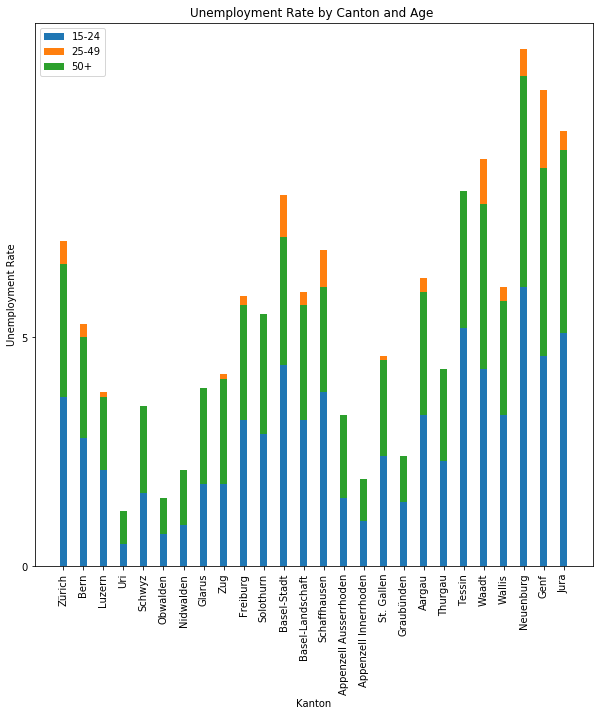

In [233]:
import matplotlib.pyplot as plt
import numpy as np
N = len(ch_data32['Kanton'].unique()) 
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,10))
p1 = plt.bar(ind, data15['Arbeitslosenquote'], width)
p2 = plt.bar(ind, data25['Arbeitslosenquote'], width, bottom=data15['Arbeitslosenquote'])
p3 = plt.bar(ind, data50['Arbeitslosenquote'], width, bottom=data15['Arbeitslosenquote'])


plt.ylabel('Unemployment Rate')
plt.xlabel('Kanton')
plt.title('Unemployment Rate by Canton and Age ')
plt.xticks(ind, [x for x in ch_data32['Kanton'].unique()],rotation='vertical')
plt.yticks(np.arange(0, 10, 5))
plt.legend((p1[0], p2[0],p3[0]), ('15-24', '25-49','50+'))

plt.show()